# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта**
- Изучить данные об объявлениях по продажи квартир.
- Изучить основные параметры объявлений (общая площадь, число комнат, расстояние до центра и т.д.)
- Изучить, какие факторы влияют на стоимость квартиры больше, а какие меньше.
- Выделить 10 локаций с наибольшим числом объявлений и узнать цену квадратного метра для каждой локации
- Узнать, как стоимость объекта зависит от расстояния до центра города

**Ход проекта**
- Загрузить необходимые библиотеки
- Скорректировать форматы данных
- Обработать явные и неявные дубликаты
- Изучить аномальные значения
- Добавить в датасет новые столбцы (тип этажа, расстояние до центра в километрах и т.д.)
- Описать основные параметры датасета (построить гистограммы, понять, как эти параметры распределены)
- Изучить скорость продажи (сколько дней висят объявления)
- Изучить зависимость стоимости жилья от разных параметров
- Исследовать стоимость одного квадратного метра в 10 населенных пунктах
- Установить взаимосвязь между расстоянием до центра города и стоимостью жилья

### Откройте файл с данными и изучите общую информацию. 

#### Импорт библиотек

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.expand_frame_repr', False)

# убираю scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Загрузка данных

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Общая информация о датасете

Посмотрим общую информацию

In [4]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [5]:
df.sample(5).T

,21782,20777,21983,4538,21359
total_images,5,11,5,13,10
last_price,7400000.000,4800000.000,3650000.000,5690000.000,6200000.000
total_area,70.010,35.000,43.200,52.000,42.600
first_day_exposition,2018-09-07T00:00:00,2019-02-26T00:00:00,2017-08-19T00:00:00,2017-09-04T00:00:00,2018-07-10T00:00:00
rooms,2,1,1,2,1
ceiling_height,2.720,2.550,2.800,2.600,2.900
floors_total,16.000,12.000,22.000,10.000,12.000
living_area,NaN,18.000,14.000,31.600,23.000
floor,3,6,2,7,6
is_apartment,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

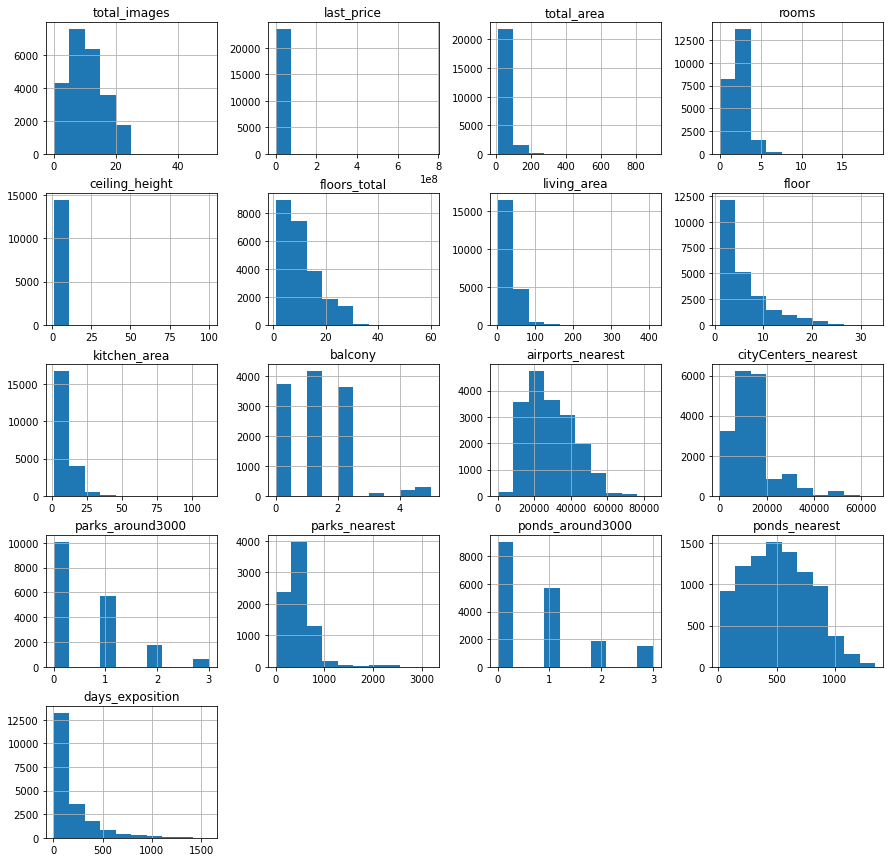

In [7]:
df.hist(figsize=(15,15))
plt.show()

#### Промежуточный вывод

Проанализировав общую информацию о датасете, мы видим, что в нем присутствуют пропуски, а также не везде корректно обозначен формат данных.

### Предобработка данных

#### Изменение типов данных и заполнение пропусков

Проверим данные на наличие пропусков.

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим на пропуски в процентных соотношениях

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропуски есть в следующих колонках:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

Часть из этих значени й можно будет заполнить на основе других значений.

Сначала заполним пропуски, которые не требуют каких-либо расчетов. Также поменяем тип данных для некоторых столбцов, чтобы сделать работу с ними удобнее.

Формат 'int' ипользую для тех значений, где встречаются только целые числа (например, этажность дома, число комнат и т.д)

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

df['is_apartment'] = df['is_apartment'].fillna(value = 'False').astype(bool)

df['balcony'] = df['balcony'].fillna(0).astype('int')

df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype('int')
df['parks_nearest'] = df['parks_nearest'].fillna(value=0).astype('int')

df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype('int')

df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

# Заполню пропуски в столбце 'floors_total'
df['floors_total'] = df['floors_total'].fillna(df['floor']).astype('int')

Заполню пропуски в 'living_area' медианным значением по групперовке через столбец 'rooms'

In [11]:
# Для этого посчитаю коэффициент корреляции
print('Коэффициент корреляции', df['living_area'].corr(df['rooms']))

0.8459774567888749

In [12]:
# Заполняю пропуски через группировку
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))

Теперь рассмотрим пропуски в столбце 'kitchen_area'.

In [12]:
print('Коэффициент корреляции', df['kitchen_area'].corr(df['total_area']))

0.6091211711198318

Мы видим, что присутствует положительная корреляция между 'kitchen_area' и 'total_area'.
Посчитаем коэффициент, который опишет зависимость площади кухни от жилой площади.

In [13]:
kitchen_area_ratio = df['kitchen_area'].mean() / df['total_area'].mean()

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_area_ratio * df['total_area'].mean())

Теперь рассмотрим пропуски в столбце 'ceiling_height'.

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Также пропуски есть в 'locality_name'. Всего 49 пропущенных значений, предлагаю удалить строки с пропусками в 'locality_name'

In [16]:
df.dropna(0, how='any', subset = ['locality_name'], inplace=True)

Проверим пропуски еще раз.

In [122]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5534
cityCenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

Что касается пропусков в:
1. airports_nearest
2. cityCenters_nearest
3. locality_name

Здесь я не стану заполнять пропуски т.к. нет возможности понять, какие значения лучше использовать для заполнения. \
В случае с airports_nearest, можно было бы использовать медиану по группам locality_name, но я не считаю, что это корректно, т.к.некоторые локации, например Санкт-Петербург, слишком большие и расстояния до аэропорта там сильно разнятся.

In [123]:
# Проверю пропуски и форматы еще раз
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5534
cityCenters_nearest     5511
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

Теперь все форматы соотвествуют данным. Также я избавился от части пропущенных значений.

#### Работа с дубликатами

**Проверим датасет на наличие дубликатов**

In [124]:
df.duplicated().sum()

0

Сначала посмотрим на список уникальных значений из столбца 'locality_name'.

In [125]:
df['locality_name'].unique()

# Здесь видно, что в названиях локаций присутствуют неявные дубликаты, например:
# 'село Павлово', 'городской поселок Павлово', 'поселок городского типа Павлово'. 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [126]:
# Чтобы устранить неявные дубликаты в названиях локаций, заменим все буквы 'ё' на 'е'.

df['locality_name'] = df['locality_name'].str.replace('ё','е')

In [127]:
# Приведем названия локаций к единому виду.
# Чтобы сделать это, нужно сначала убрать все пропуски в 'locality_name'

df['locality_name'] = df['locality_name'].fillna(value = 'Неизвестно')
# я выделил объявления с пропущенной локацией в отдельную группу, заменив пропуск на "неизвестно"

df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('поселок городского типа', 'поселок'))
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('поселок при железнодорожной станции', 'поселок'))
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('городской поселок', 'поселок'))
df['locality_name'] = df['locality_name'].apply(lambda x: x.replace('поселок станции', 'поселок'))
df['locality_name'] = (
    df['locality_name'].apply(
        lambda x: x.replace(
            'садоводческое некоммерческое товарищество', 
            'садоводческое товарищество')
    )
        )


#### Работа с аномальными значениями

Проверим значения в ceiling_height на аномалии или ошибки.

In [128]:
# Сортирую список уникальных значений столбца 'ceiling_height', чтобы было проще обнаружить аномальные значения.
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

Среди значений есть необычно большие значения (например: 27.5). \
Предположим, что эти начения ошибочные. Они могли появиться в результате того, что пользователь поместил запятую не в том месте. \
Чтобы исправить эти значения, разделим из на 10, таким образом мы сдвиним запятую и получим высоту потолка, которая лучше вписывается в наши данные. Но, не во всех случаях, например, есть значение 100, поделив его на 10, мы все равно получим аномальное значение. Поэтому, я предлагаю удалить строки с этими значениями. \
Посмотрим, сколько таких данных в датасете и сколько процентов они составляют.

In [129]:
print(len(df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4.5)]))

print(len(df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4.5)]) / len(df))

58
0.002452431289640592


Мы видим, что очень маленьое количество строк содержат аномальные данные. \
Предлагаю просто избавиться от этих строк, вместо того, чтобы менять их

In [130]:
df = df.drop(df[(df.ceiling_height < 2.3) | (df.ceiling_height > 4.5)].index)

In [131]:
#проверим удаление

len(df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4.5)])

0

In [132]:
# Проверим значения в стобце 'rooms'

sorted(df['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

Здесь явно есть аномальные значения, например 0. \
Посмотрим, сколько таких значений содержится в датасете.

In [133]:
print(len(df[(df['rooms'] == 0)]))
print(len(df[(df['rooms'] == 0)]) / len(df))

195
0.008265513733468972


Ситуация аналагичная с аномалиями в 'ceiling_height'. \
Просто удалим строки с этими значениями.

In [134]:
df = df.drop(df[(df.rooms == 0)].index)

Проверим столбец 'floors_total'

<AxesSubplot:>

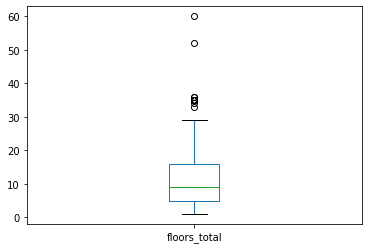

In [135]:
df['floors_total'].plot.box()

In [136]:
sorted(df['floors_total'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 33,
 34,
 35,
 36,
 52,
 60]

Есть несколько аномально больших значений.
На данный момент, самое высокое жилое здание в СПб - [ЖК «Князь Александр Невский»](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0) \
В нем 37 этажей. \
Можем предположить, что все значения, которые больше 37 - это аномалии. \
Посмотрим, сколько таких значений в датасете.

In [137]:
print(len(df[(df['floors_total'] > 37)]))

2


Всего две строки содержат аномальные значеним. Удалим эти строки.

In [138]:
df = df.drop(df[(df.floors_total > 37)].index)

**Вывод**

Изучив повторы и аномальные данные, я могу сделать вывод, что большенство этих ошибок могут быть связаны с некорректным заполнением со стороны пользователей.
Например, пользователь мог ошибиться в этажности дома, не указать число комнат, что привело к 0 комнат в квартире или перепутать запятую при заполнении высоты потолка.
Возможно, стоит переработать способ заполнения данных о квартире, например, прадлагать выбирать кол-во комнат из меню или выбирать высоту потолка ползунком.

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в таблицу следующие столбцы:

- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [139]:
# цена одного квадратного метра
df['sqr_meter_price'] = df['last_price'] / df['total_area'] 

In [140]:
# день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

# достанем день публикации методом dt.day_name() и поменстим в новую колонку
df['day_of_week'] = df['first_day_exposition'].dt.day_name()

# теперь нам нужно заменить названия дней недели на цифры
# Возьмем список дней недели, т.е. уникальных значений 'day_of_week'
df['day_of_week'].unique()

#Теперь создадим словарь, где каждому дню присвоем номер
days_of_week_dict = {'Thursday':3, 'Tuesday':1, 'Friday':4, 'Monday':0, 'Wednesday':2, 'Sunday':6, 'Saturday':5}

# Заменим дни недели используя словарь
df.replace({'day_of_week': days_of_week_dict})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,day_of_week
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,True,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482,2,755,0,120370.370,3
1,7,3350000.000,40.400,2018-12-04,1,2.650,11,18.600,1,True,False,False,11.000,2,поселок Шушары,12817.000,18603.000,0,0,0,0,81,82920.792,1
2,10,5196000.000,56.000,2015-08-20,2,2.650,5,34.300,4,True,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90,2,574,558,92785.714,3
3,0,64900000.000,159.000,2015-07-24,3,2.650,14,45.000,9,True,False,False,10.570,0,Санкт-Петербург,28098.000,6800.000,2,84,3,234,424,408176.101,4
4,2,10000000.000,100.000,2018-06-19,2,3.030,14,32.000,13,True,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112,1,48,121,100000.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21,3,3.700,5,73.300,3,True,False,False,13.830,0,Санкт-Петербург,24665.000,4232.000,1,796,3,381,0,72490.845,1
23695,14,3100000.000,59.000,2018-01-15,3,2.650,5,38.000,4,True,False,False,8.500,0,Тосно,NaN,NaN,0,0,0,0,45,52542.373,0
23696,18,2500000.000,56.700,2018-02-11,2,2.650,3,29.700,1,True,False,False,10.570,0,село Рождествено,NaN,NaN,0,0,0,0,0,44091.711,6
23697,13,11475000.000,76.750,2017-03-28,2,3.000,17,30.500,12,True,False,False,23.300,2,Санкт-Петербург,39140.000,10364.000,2,173,3,196,602,149511.401,1


In [141]:
# месяц публикации объявления
df['month'] = df['first_day_exposition'].dt.month

In [142]:
# год публикации объявления
df['year'] = df['first_day_exposition'].dt.year

In [143]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)
# создадим функцию для категоризации
def floor_category(x):
    try:
        if x['floor'] == 1:
            return 'первый'
        elif x['floor'] == x['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка'

df['floor_category'] = df.apply(floor_category, axis=1)

In [144]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,day_of_week,month,year,floor_category
6193,19,24300000.000,230.000,2016-06-03,4,2.650,3,90.000,2,False,False,False,70.000,0,Санкт-Петербург,39422.000,15354.000,0,0,1,345,397,105652.174,Friday,6,2016,другой
15126,13,4585000.000,68.600,2018-03-01,2,2.500,10,39.100,10,True,False,False,13.200,0,деревня Новое Девяткино,NaN,NaN,0,0,0,0,60,66836.735,Thursday,3,2018,последний
6207,9,7300000.000,80.000,2017-07-05,3,3.000,4,47.000,3,True,False,False,8.500,0,Санкт-Петербург,22097.000,6370.000,1,437,2,675,19,91250.000,Wednesday,7,2017,другой
22034,7,3400000.000,28.000,2017-11-03,1,2.650,24,15.000,5,True,False,False,5.000,0,поселок Парголово,52480.000,18657.000,0,0,0,0,81,121428.571,Friday,11,2017,другой
10075,13,4200000.000,35.800,2017-10-30,1,2.650,14,17.800,2,True,False,False,8.100,0,Санкт-Петербург,37534.000,12606.000,0,0,0,0,24,117318.436,Monday,10,2017,другой
21761,14,6900000.000,59.700,2017-02-13,2,2.650,9,33.400,7,True,False,False,8.400,0,Санкт-Петербург,40476.000,12170.000,1,416,2,695,49,115577.889,Monday,2,2017,другой
12495,6,4440000.000,42.000,2016-11-19,2,2.650,5,24.000,2,True,False,False,7.000,1,Санкт-Петербург,28411.000,7350.000,1,223,2,457,376,105714.286,Saturday,11,2016,другой
5925,4,4190000.000,49.000,2017-08-28,4,2.600,5,37.100,2,True,False,False,5.300,0,Санкт-Петербург,21854.000,14516.000,0,0,1,241,0,85510.204,Monday,8,2017,другой
21376,11,2100000.000,59.000,2017-04-28,2,2.500,5,30.000,4,False,False,False,9.000,2,деревня Нурма,NaN,NaN,0,0,0,0,282,35593.220,Friday,4,2017,другой
13918,13,2130000.000,36.000,2017-11-27,1,3.200,3,18.000,3,True,False,False,10.570,0,поселок Понтонный,30087.000,31799.000,0,0,0,0,131,59166.667,Monday,11,2017,последний


In [145]:
# расстояние в км до центра города
# добавим эти данные новый столбец
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000


In [196]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round(decimals=0)

In [197]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,day_of_week,month,year,floor_category,cityCenters_nearest_km,last_price_thousand
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,True,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482,2,755,0,120370.370,Thursday,3,2019,другой,16.000,13000.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11,18.600,1,True,False,False,11.000,2,поселок Шушары,12817.000,18603.000,0,0,0,0,81,82920.792,Tuesday,12,2018,первый,19.000,3350.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5,34.300,4,True,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90,2,574,558,92785.714,Thursday,8,2015,другой,14.000,5196.000
3,0,64900000.000,159.000,2015-07-24,3,2.650,14,45.000,9,True,False,False,10.570,0,Санкт-Петербург,28098.000,6800.000,2,84,3,234,424,408176.101,Friday,7,2015,другой,7.000,64900.000
4,2,10000000.000,100.000,2018-06-19,2,3.030,14,32.000,13,True,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112,1,48,121,100000.000,Tuesday,6,2018,другой,8.000,10000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21,3,3.700,5,73.300,3,True,False,False,13.830,0,Санкт-Петербург,24665.000,4232.000,1,796,3,381,0,72490.845,Tuesday,3,2017,другой,4.000,9700.000
23695,14,3100000.000,59.000,2018-01-15,3,2.650,5,38.000,4,True,False,False,8.500,0,Тосно,NaN,NaN,0,0,0,0,45,52542.373,Monday,1,2018,другой,NaN,3100.000
23696,18,2500000.000,56.700,2018-02-11,2,2.650,3,29.700,1,True,False,False,10.570,0,село Рождествено,NaN,NaN,0,0,0,0,0,44091.711,Sunday,2,2018,первый,NaN,2500.000
23697,13,11475000.000,76.750,2017-03-28,2,3.000,17,30.500,12,True,False,False,23.300,2,Санкт-Петербург,39140.000,10364.000,2,173,3,196,602,149511.401,Tuesday,3,2017,другой,10.000,11475.000


Чтобы сделать гистограммы с ценам более наглядными, добавим столбец, last_price / 1000 \
Назовем его last_price_thousand

In [147]:
df['last_price_thousand'] = df['last_price'] / 1000

### Проведите исследовательский анализ данных

#### Изучение и описание параметров

Изучим и опишем следующие значения:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

Для этого построим гистограмму для каждого параметра.

##### Описание параметра общая площадь ('total_area')

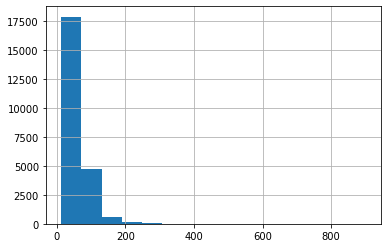

In [148]:
df['total_area'].hist(bins = 15)
plt.show()

Из-за разброса данных по оси X, гистограмма плохо читается. Попробуем ограничить ее по оси X.

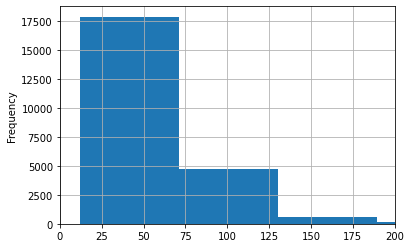

In [149]:
df['total_area'].plot.hist(xlim=[0,200], bins=15, grid=True)
plt.show()

Большенство объявлений в датасете - это квартиры площадью менее 75 метров. далее мы наблюдаем резкий спад и видим квартиры в диапазоне от 75 до 125 метров. Квартиры площадью более 125 метров встречаются крайне редко.

In [150]:
df['total_area'].describe()

count   23395.000
mean       60.532
std        35.340
min        12.000
25%        40.155
50%        52.000
75%        70.000
max       900.000
Name: total_area, dtype: float64

##### Описание параметра жилая площадь ('living_area')

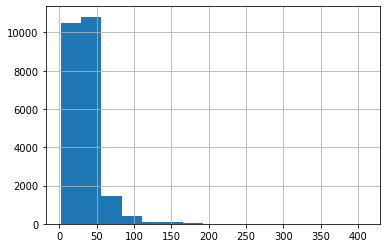

In [151]:
df['living_area'].hist(bins = 15)
plt.show()

In [152]:
df['living_area'].describe()

count   23395.000
mean       34.408
std        21.580
min         2.000
25%        18.500
50%        30.500
75%        42.800
max       409.700
Name: living_area, dtype: float64

##### Описание параметра площадь кухни ('kitchen_area')

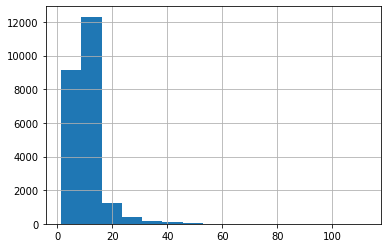

In [153]:
df['kitchen_area'].hist(bins = 15)
plt.show()

In [154]:
df['kitchen_area'].describe()

count   23395.000
mean       10.562
std         5.619
min         1.300
25%         7.300
50%        10.000
75%        11.500
max       112.000
Name: kitchen_area, dtype: float64

##### Описание параметра цена объекта ('last_price')

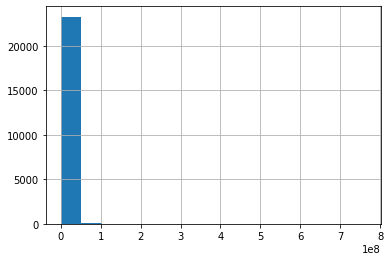

In [155]:
df['last_price'].hist(bins = 15)
plt.show()

In [156]:
df['last_price'].describe()

count       23395.000
mean      6541958.217
std      10794882.814
min         12190.000
25%       3450000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

##### Описание параметра количество комнат ('rooms')

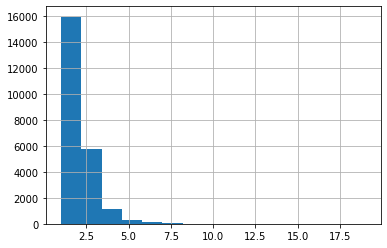

In [157]:
df['rooms'].hist(bins = 15)
plt.show()

Ограничим диапазон значений в гистограмме, чтобы сделать ее более наглядной.

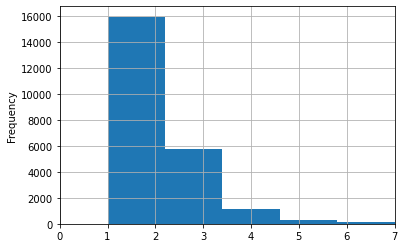

In [158]:
df['rooms'].plot.hist(xlim=[0,7], bins=15, grid=True)
plt.show()

In [159]:
df['rooms'].describe()

count   23395.000
mean        2.087
std         1.065
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

Большенство квартир в датасете - однакомнатные.
Медианное число комнат - 2 \
Квартиры с числом комнат больше 3 встречаются намного реже остальных.

##### Описание параметра высота потолков ('ceiling_height')

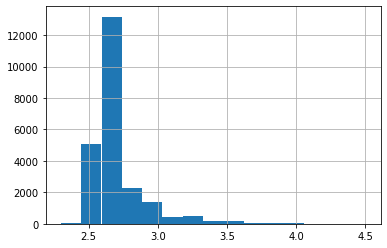

In [160]:
df['ceiling_height'].hist(bins = 15)
plt.show()

In [161]:
df['ceiling_height'].describe()

count   23395.000
mean        2.696
std         0.213
min         2.300
25%         2.600
50%         2.650
75%         2.700
max         4.500
Name: ceiling_height, dtype: float64

Средняя и медианная высота потолка практически одинаковые - это примерно 2.7 метра \
Квартиры сболее высокими или низкими потолками встречаются значительно реже.

##### Описание параметра этаж квартиры ('floor')

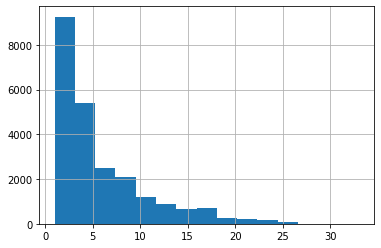

In [162]:
df['floor'].hist(bins = 15)
plt.show()

In [163]:
df['floor'].describe()

count   23395.000
mean        5.871
std         4.863
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

Здесь мы видим, что болешнство квартир распологается на первых пяти этажах. \
Далее наблюдается резкий спад.

##### Описание параметра тип этажа квартиры («первый», «последний», «другой») ('floor_category')

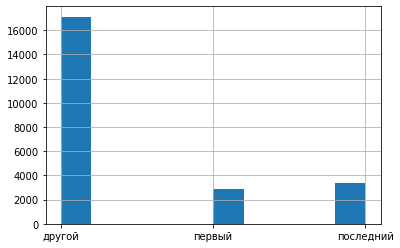

In [164]:
df['floor_category'].hist(bins = 10)
plt.show()

In [165]:
df['floor'].describe()

count   23395.000
mean        5.871
std         4.863
min         1.000
25%         2.000
50%         4.000
75%         8.000
max        33.000
Name: floor, dtype: float64

Большенство объявлений - это квартиры не на первых и последних этажах. Первые этажи встречеются немного реже последних. Можно предположить, что это связано с тем, что во многих относительно новых домах на первых этажах часто распологается коммерция.

##### Описание параметра общее количество этажей в доме ('floors_total')

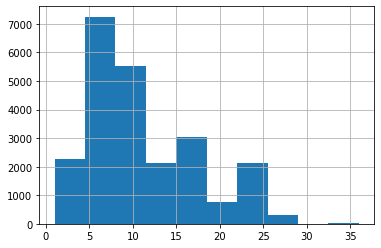

In [166]:
df['floors_total'].hist(bins = 10)
plt.show()

In [167]:
df['floors_total'].describe()

count   23395.000
mean       10.623
std         6.550
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        36.000
Name: floors_total, dtype: float64

Судя по гистограмме, большенство объявлений - это квартиры в 5 - 10 этажных домах. Дома ниже 5 этажей и ниже 15 встречаются примерно одинаково часто.

##### Описание параметра расстояние до центра города в метрах ('cityCenters_nearest')

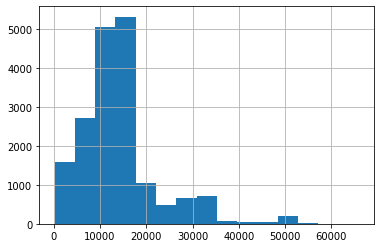

In [168]:
df['cityCenters_nearest'].hist(bins = 15)
plt.show()

In [169]:
df['cityCenters_nearest'].describe()

count   17984.000
mean    14206.276
std      8619.851
min       181.000
25%      9241.000
50%     13104.500
75%     16293.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

Большенство квартир расположены на расстоянии до 2000 метров до центра. Квартиры дальше чем 3500 метров от центра встречаются крайне редко.

##### Описание параметра расстояние до ближайшего аэропорта ('airports_nearest')

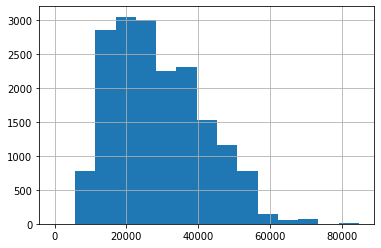

In [170]:
df['airports_nearest'].hist(bins = 15)
plt.show()

In [171]:
df['airports_nearest'].describe()

count   17962.000
mean    28832.372
std     12634.513
min         0.000
25%     18585.000
50%     26772.000
75%     37319.750
max     84869.000
Name: airports_nearest, dtype: float64

##### Описание параметра расстояние до ближайшего парка ('parks_nearest')

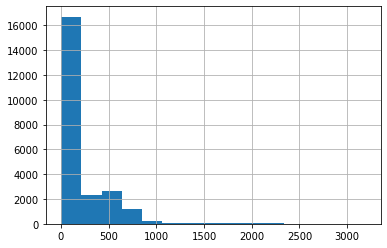

In [172]:
df['parks_nearest'].hist(bins = 15)
plt.show()

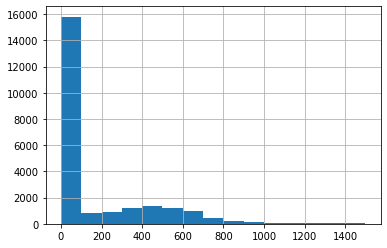

In [173]:
df['parks_nearest'][df['parks_nearest'] < 1500].hist(bins = 15)
plt.show()

In [174]:
df['parks_nearest'].describe()

count   23395.000
mean      167.931
std       307.266
min         0.000
25%         0.000
50%         0.000
75%       303.000
max      3190.000
Name: parks_nearest, dtype: float64

##### Описание параметра день и месяц публикации объявления

In [175]:
#df.hist('day_of_week')

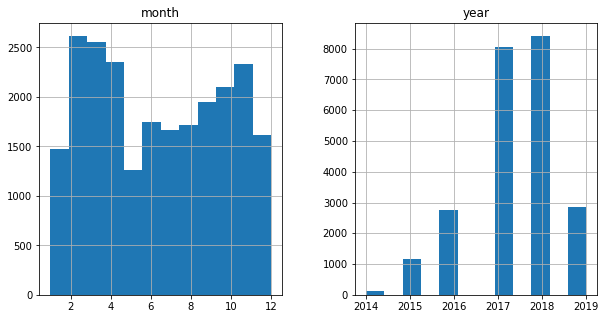

In [176]:
df.hist(column=['day_of_week', 'month', 'year'], bins = 12, figsize=(10, 5))
plt.show()

In [177]:
df['day_of_week'].describe()

count        23395
unique           7
top       Thursday
freq          4233
Name: day_of_week, dtype: object

In [178]:
df['month'].describe()

count   23395.000
mean        6.396
std         3.491
min         1.000
25%         3.000
50%         6.000
75%        10.000
max        12.000
Name: month, dtype: float64

In [179]:
df['year'].describe()

count   23395.000
mean     2017.369
std         1.040
min      2014.000
25%      2017.000
50%      2017.000
75%      2018.000
max      2019.000
Name: year, dtype: float64

#### Задание 1

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

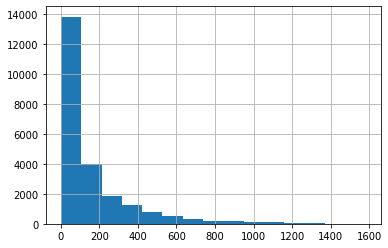

In [180]:
df['days_exposition'].hist(bins=15)
plt.show()

Скорректируем диопазон значений по оси X, чтобы сделать гистограмму более наглядной и читаемой.

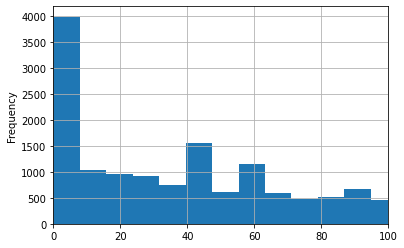

In [181]:
df['days_exposition'].plot.hist(xlim=[0,100], bins=200, grid=True)
plt.show()

Гистограмма 2

In [182]:
df['days_exposition'].describe()

count   23395.000
mean      156.975
std       214.021
min         0.000
25%        22.000
50%        74.000
75%       199.000
max      1580.000
Name: days_exposition, dtype: float64

Средняя длительность размещения объвления - 157 дней \
Медианная длительность размещения - 74 дня

На гистограмме 2 мы видим пики в районе 10, 40 и 60 дней. Больная часть квартир продается за такой период.
Здесь важно понимать, что снятие квартиры с сайта объявлений не обязательно означает продажу.

Необычно долгие продажи - это продажи, которые занимают более 200 дней.


#### Задание 2

Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

##### Зависимость стоимости от общей площади

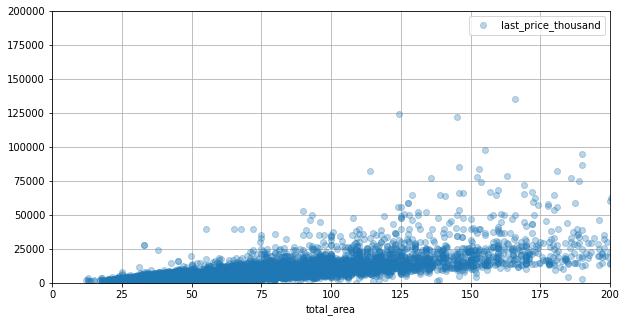

In [183]:
#Зависимость стоимости от общей площади
df.plot(x='total_area', y='last_price_thousand', style='o', xlim=(0, 200), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

In [184]:
df['living_area'].corr(df['last_price_thousand'])

0.550209345871693

На графике мы видим увеличение стоимости вместе с ростом общей площади квартиры.

##### Зависимость стоимости от жилой площади

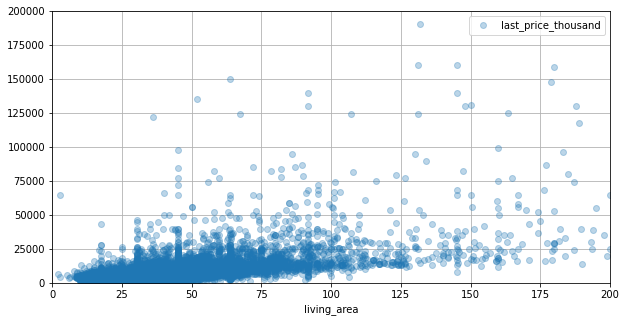

In [185]:
df.plot(x='living_area', y='last_price_thousand', style='o', xlim=(0, 200), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

In [186]:
df['last_price_thousand'].corr(df['kitchen_area'])

0.43781377324603554

Здесь мы опять видим влияние жилой площади на стоимость квартыры. Цена квартиры растет вместе с жило площадью.

##### Зависимость стоимости от площади кухни

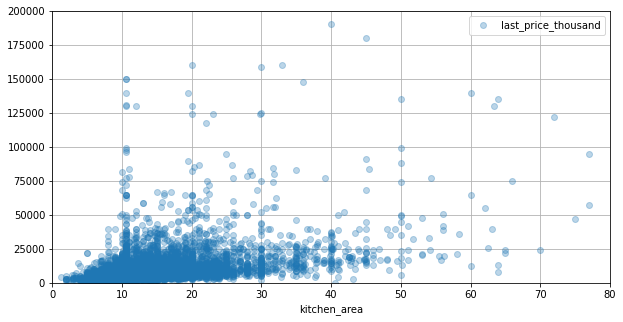

In [187]:
df.plot(x='kitchen_area', y='last_price_thousand', style='o', xlim=(0, 80), ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

##### Зависимость стоимости от количество комнат

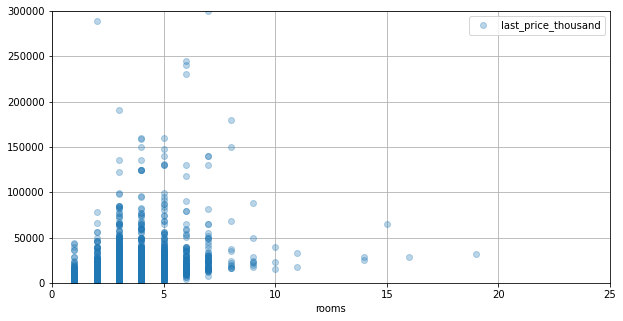

In [188]:
df.plot(x='rooms', y='last_price_thousand', style='o', xlim=(0, 25), ylim=(0, 300000), grid=True, figsize=(10, 5), alpha=0.3)
plt.show()

Мы видим возрастающую стоимость  при увеличении числа комнал. Однако, квартиры с количеством комнат больше пяти могут стоить и дешевле при большем числе комнат.

##### Зависимость стоимости от типа этажа, на котором расположена квартира (первый, последний, другой)

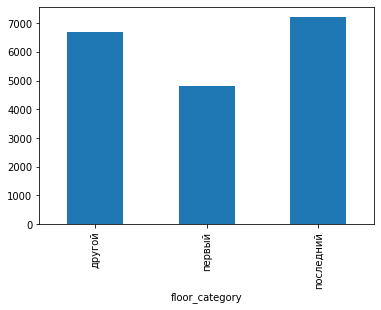

In [189]:
#df.plot(x='floor_category', y='last_price_thousand', kind='bar', ylim=(0, 200000), grid=True, figsize=(10, 5))
#

df.groupby('floor_category')['last_price_thousand'].mean().plot.bar()
plt.show()

Здесь мы видим, что квартиры на превом этаже стоят дешевле. при этом последнимй этаж влияет на стоимость больше, чем этажи из категории 'другие'.

##### Зависимость стоимости от даты размещения (день недели, месяц, год)

**Зависимость стоимости от дня размещения**

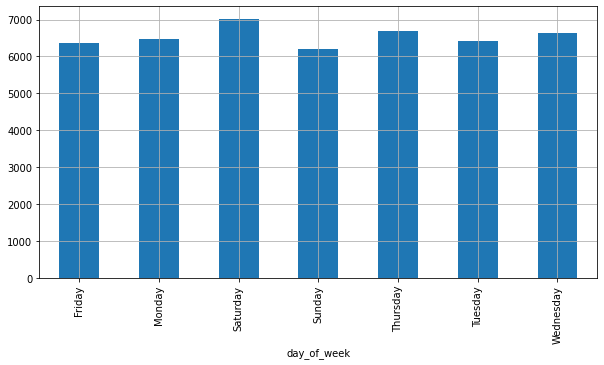

In [190]:
df.groupby('day_of_week')['last_price_thousand'].mean().plot(
    x='year', 
    kind='bar', 
    y='last_price', 
    style='o', 
    xlim=(2000, 2018), 
    grid=True, 
    figsize=(10, 5))
plt.show()

**Зависимость стоимости от месяца размещения**

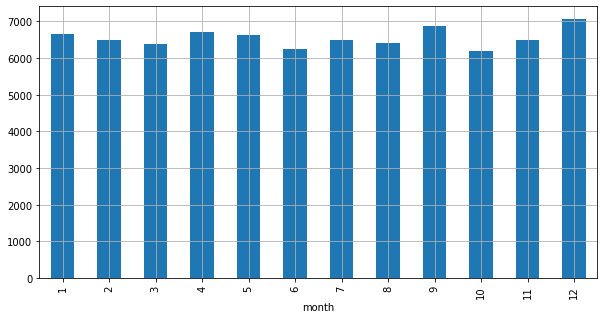

In [191]:
df.groupby('month')['last_price_thousand'].mean().plot(
    x='year', 
    kind='bar', 
    y='last_price', 
    style='o', 
    xlim=(2000, 2018), 
    grid=True, 
    figsize=(10, 5))
plt.show()

Здесь нет выраженной зависимости между месяцем или днем публикации и стоимостью квартиры.

**Зависимость стоимости от года размещения**

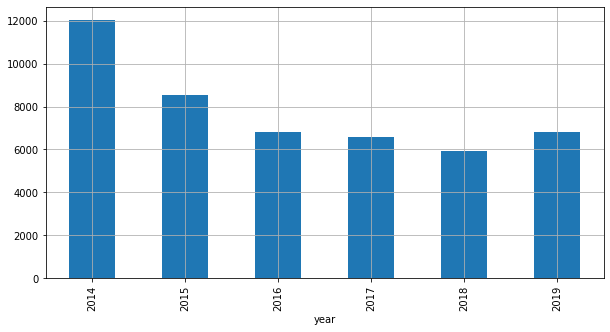

In [192]:
df.groupby('year')['last_price_thousand'].mean().plot(
    x='year', 
    kind='bar', 
    y='last_price_thousand', 
    style='o', 
    xlim=(2000, 2018), 
    grid=True, 
    figsize=(10, 5))
plt.show()

#### Задание 3

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [193]:
#df.groupby('locality_name')['sqr_meter_price'].mean().sort_values(ascending=False).head(10)

print('10 населенных пунктов с самой высокой стоимость квадратного метра')
# Таблица с ТОП 10 населенными пунктами по кол-ву объявлений
top_city_count = df['locality_name'].value_counts().sort_values(ascending=False).head(10)
top_city_count
# Теперь узнаем среднюю стоимость метра квадратного для локаций из списка выше
top_city_price = df.query('locality_name in @top_city_count.index').pivot_table(index='locality_name', values='sqr_meter_price', aggfunc='mean')
top_city_price['sqr_meter_price'].sort_values(ascending=False)

10 населенных пунктов с самой высокой стоимость квадратного метра


locality_name
Санкт-Петербург     114635.814
Пушкин              103125.819
деревня Кудрово      92297.219
поселок Парголово    90289.778
поселок Мурино       85040.965
поселок Шушары       78405.738
Колпино              75424.579
Гатчина              68757.679
Всеволожск           68683.762
Выборг               58238.143
Name: sqr_meter_price, dtype: float64

#### Задание 4

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [194]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqr_meter_price,day_of_week,month,year,floor_category,cityCenters_nearest_km,last_price_thousand
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,True,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482,2,755,0,120370.370,Thursday,3,2019,другой,16.028,13000.000
1,7,3350000.000,40.400,2018-12-04,1,2.650,11,18.600,1,True,False,False,11.000,2,поселок Шушары,12817.000,18603.000,0,0,0,0,81,82920.792,Tuesday,12,2018,первый,18.603,3350.000
2,10,5196000.000,56.000,2015-08-20,2,2.650,5,34.300,4,True,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90,2,574,558,92785.714,Thursday,8,2015,другой,13.933,5196.000


      cityCenters_nearest_km  last_price_thousand
0                      0.181            31099.000
1                      0.208             5800.000
2                      0.215            10990.000
3                      0.287             9590.000
4                      0.291            11500.000
...                      ...                  ...
6274                  28.644             4775.000
6275                  28.806             4370.000
6276                  29.263             4850.000
6277                  29.343             4200.000
6278                  29.493             2450.000

[6279 rows x 2 columns]


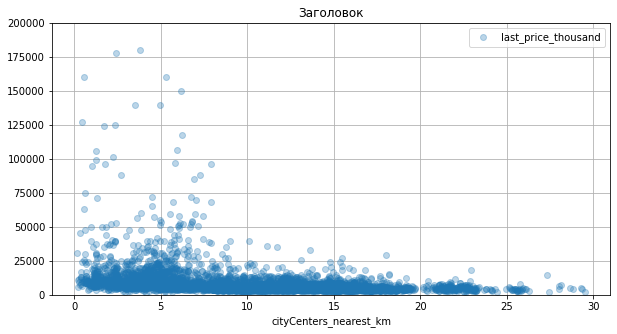

In [195]:
# Создадим таблицу, в которой выберем только локацию 'Санкт-Петербург'.
# сгрупперуем цены по расстоянию до центра города в километрах.
spb_prices_per_center_km = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='cityCenters_nearest_km',
    values='last_price_thousand',
    aggfunc='mean').reset_index()
print(spb_prices_per_center_km)

spb_prices_per_center_km.plot(x='cityCenters_nearest_km', y='last_price_thousand', style='o',\
                              ylim=(0, 200000), grid=True, figsize=(10, 5), alpha=0.3, title = 'Заголовок')
plt.show()

На графике видно, что с увеличением расстояния до центра снижается и стоимость квартиры.
Приэтом мы видим некоторые объекты, которые имеют высокую стоимость, находясь достаточно далеко от центра. Это могут быть загородные дома.
наиболее дорогие предложения расположены примерно в 5 - 7 км от центра.

### Общий вывод

В рамках данного проекта передомной стояло несколько задач:

1) Предобработать данные, скорректировать типы данных, избавиться от дубликатов и анамальных значений \
2) Создание новых таблиц с категориями \
3) Провести исследовательский анализ данных

**Обнаруженные ошибки**

При обработке данных я столкнулся с рядом ошибок и аномальных значений.
Например, высота потолков и этажность дома невседа выглядят правдоподобно. Можно предположить, что пользователи могли ошибиться, когда заполняли данные объявления.

В названиях населенных пунктов часто используются синонимичные названия (например 'поселок' и 'поселок городского типа').
Скорее всего, это ошибка возникает из-за того, что люди заполняют адреса вручную. Это можно исправить, сделав список населенных пунктов из которого пользователь сможет выбрать свой населенный пункт.

Также я добавил дополнительные столбцы с категориями: \
1) цена одного квадратного метра \
2) день публикации объявления (0 - понедельник, 1 - вторник и т.д.) \
3) месяц публикации объявления \
4) год публикации объявления \
5) тип этажа квартиры (значения — «первый», «последний», «другой») \
6) расстояние в км до центра города \

Эти столбцы помогут проанализировать механизм формирования стоимости квартиры.

**Изучение основных параметров**

Посмотрев основные параметры, я сделал следующе выводы: 
- Площадь большенства квартир не превышает 70 метров квадратных
- медианная площадь кухни - 10 метров
- средняя стоимость квартиры - 6 541 958.22
- большенство квартир - 1 или 2 комнатные
- средняя высота потолков - 2.696
- большая часть квартир распологается не выше 5 этажа
- 


**Скорость продажи**

Средняя длительность размещения объвления - 157 дней
Медианная длительность размещения - 74 дня

Большенство объявлений достигают продажи до период до 100 дней.

**Факторы влияющие на стоимость жилья**

Изучая факторы формирования стоимости квартиры, я сделал следующие выводы:
- Общая площадь непосредственно влияет на стоимость квартиры. Здесь мы видим достаточно стабильную связь
- Аналогичным образом на стоимсть влияют общая жилая площадь и площадь кухни
- Нет прямой зависимости между этажем и стоимостью. Здесь можно отметить, что дороже всего квартиры стоят в промежутке до 5 или шестого этажа.

**Топ 10 локаций по стоимости квадратного метра**

Зеленогорск         115122.79
Санкт-Петербург     114635.81
поселок Репино      104238.61
Пушкин              103125.81
Сестрорецк          101757.61
поселок Лисий Нос   100660.81
Кудрово              99989.42
деревня Мистолово    98549.97
поселок Левашово     96997.69
Мурино               92479.98

**Влияние расстояния до центра города в Санкт-петербурге**

Изучив зависимость расстояния до центра города в СПБ, я сделал вывод, что наиболее дорогие квартиры, как правило, находятся на расстоянии 5 - 7 км от центра города.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод